## roster model estimation

To determine the impact each roster position has on team success, we need to examine the quality of players per game and the result of each game. For each roster position, there will be elite players and secondary players per team. Elite players will be assinged a value of 1 whereas secondary players, a value 2.

### import data sets  "play by play goal detail" and "game detail"

In [79]:
import sys
import os
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy
import zipfile


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)


In [80]:
pwd

'/Users/stefanostselios/Desktop/nhl_roster_design-master'

In [81]:
d0 = pd.read_csv('season_teams_roster.csv', index_col=0)
d1 = pd.read_csv('season_team.csv', index_col=0)

In [82]:
d0.columns

Index(['Season', 'TeamCode', 'GP', 'W', 'L', 'GF', 'GA', 'WinPc', 'LossPc',
       'Mean_F', 'Mean_D'],
      dtype='object')

In [83]:
d1.columns

Index(['Season', 'TeamCode', 'RosterCount', 'MeanF1', 'MeanF2', 'MeanD1',
       'MeanD2'],
      dtype='object')

In [84]:
dm = d0.merge(d1, on=['Season', 'TeamCode'], how='left')
dm.head()

,Season,TeamCode,GP,W,L,GF,GA,WinPc,LossPc,Mean_F,Mean_D,RosterCount,MeanF1,MeanF2,MeanD1,MeanD2
0,2010,MTL,68,37,31,188,181,0.544118,0.455882,1.734069,1.825980,18.0,3.191176,8.808824,1.044118,4.955882
1,2010,TOR,70,34,36,195,218,0.485714,0.514286,1.834524,1.888095,18.0,1.985714,10.014286,0.671429,5.328571
2,2010,PHI,72,41,31,235,207,0.569444,0.430556,1.592593,1.571759,18.0,4.888889,7.111111,2.569444,3.430556
3,2010,PIT,71,40,31,204,180,0.563380,0.436620,1.642019,1.561033,18.0,4.295775,7.704225,2.633803,3.366197
4,2010,CAR,76,38,38,222,218,0.500000,0.500000,1.751096,1.804825,18.0,2.986842,9.013158,1.171053,4.828947


In [85]:
dm['DF'] = dm['MeanF1'] - dm['MeanF2']
dm['DD'] = dm['MeanD1'] - dm['MeanD2']

In [86]:
dm.shape

(30, 18)

In [87]:
dm.isnull().sum()

Season         0
TeamCode       0
GP             0
W              0
L              0
GF             0
GA             0
WinPc          0
LossPc         0
Mean_F         0
Mean_D         0
RosterCount    0
MeanF1         0
MeanF2         0
MeanD1         0
MeanD2         0
DF             0
DD             0
dtype: int64

## Summary analysis

In [88]:
dm.describe()

,Season,GP,W,L,GF,GA,WinPc,LossPc,Mean_F,Mean_D,RosterCount,MeanF1,MeanF2,MeanD1,MeanD2,DF,DD
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2010.0,67.666667,33.833333,33.833333,192.233333,192.233333,0.498496,0.501504,1.747567,1.752933,18.0,3.029195,8.970805,1.482401,4.517599,-5.941610,-3.035198
std,0.0,8.052985,7.991734,7.240134,29.395852,27.583958,0.094480,0.094480,0.126848,0.155524,0.0,1.522172,1.522172,0.933143,0.933143,3.044344,1.866286
min,2010.0,38.000000,18.000000,20.000000,112.000000,126.000000,0.296875,0.342466,1.519231,1.530702,18.0,0.000000,6.230769,0.000000,3.184211,-12.000000,-6.000000
25%,2010.0,66.250000,28.250000,30.000000,176.750000,175.250000,0.438263,0.432072,1.637527,1.612522,18.0,2.019136,7.650321,0.924901,3.675132,-7.961727,-4.150198
50%,2010.0,70.000000,36.500000,31.500000,195.500000,188.500000,0.520833,0.479167,1.746702,1.752412,18.0,3.039575,8.960425,1.485526,4.514474,-5.920850,-3.028947
75%,2010.0,72.000000,40.000000,37.500000,205.750000,213.250000,0.567928,0.561737,1.831739,1.845850,18.0,4.349679,9.980864,2.324868,5.075099,-3.300642,-1.350263
max,2010.0,76.000000,48.000000,47.000000,238.000000,241.000000,0.657534,0.703125,2.000000,2.000000,18.0,5.769231,12.000000,2.815789,6.000000,-0.461538,-0.368421


### estimate roster model 

- regress home win on the difference in number of home and visitor players by position and quality (predictor variables). Add a constant to the predictors and use OLS. The purpose is to deterimine the impact each roster positin has on home team success.

In [89]:
y = dm['WinPc']  
X = sm.add_constant(dm[['MeanF1', 'MeanD1', 'MeanF2', 'MeanD2']] )
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  WinPc   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     76.24
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           7.84e-12
Time:                        21:41:52   Log-Likelihood:                 57.135
No. Observations:                  30   AIC:                            -108.3
Df Residuals:                      27   BIC:                            -104.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0073      0.000     43.334      0.000         0.007     0.008
MeanF1         0.0697      0.004     15.674      0.000         0.061     0.079
MeanD1         0.0279      0.006      4.401      0.000         0.015     0.041
MeanF2         0.0184      0.003      5.316      0.000         0.011     0.026
MeanD2         0.0162      0.006      2.576      0.016         0.003     0.029
==============================================================================
Omnibus:                       22.450   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.152
Skew:                          -1.596   Prob(JB):                     7.03e-10
Kurtosis:                       7.850   Cond. No.                     8.28e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
result.params

const     0.007348
MeanF1    0.069747
MeanD1    0.027893
MeanF2    0.018432
MeanD2    0.016197
dtype: float64

In [91]:
y = dm['WinPc']  
X = sm.add_constant(dm[['MeanF1']] )
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  WinPc   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           7.63e-13
Time:                        21:41:52   Log-Likelihood:                 56.663
No. Observations:                  30   AIC:                            -109.3
Df Residuals:                      28   BIC:                            -106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3257      0.016     20.856      0.000         0.294     0.358
MeanF1         0.0570      0.005     12.343      0.000         0.048     0.067
==============================================================================
Omnibus:                       21.045   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.117
Skew:                          -1.540   Prob(JB):                     1.44e-08
Kurtosis:                       7.406   Cond. No.                         8.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
y = dm['WinPc']  
X = sm.add_constant(dm[['MeanF1', 'MeanD1', 'MeanF2', 'MeanD2']] )
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.664127
         Iterations 4


/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:971: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  WinPc   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Nov 2017   Pseudo R-squ.:                 0.04185
Time:                        21:41:52   Log-Likelihood:                -19.924
converged:                       True   LL-Null:                       -20.794
                                        LLR p-value:                    0.4188
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0076   1.47e+07   5.15e-10      1.000     -2.88e+07  2.88e+07
MeanF1         0.1513   2.66e+06    5.7e-08      1.000     -5.21e+06  5.21e+06
MeanD1         0.0447        nan        nan        nan           nan       nan
MeanF2        -0.0605   2.66e+06  -2.28e-08      1.000     -5.21e+06  5.21e+06
MeanD2         0.0008        nan        nan        nan           nan       nan
==============================================================================
"""

In [93]:
y = dm['WinPc']  
X = sm.add_constant(dm[['MeanF1']] )
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.664265
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  WinPc   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Nov 2017   Pseudo R-squ.:                 0.04166
Time:                        21:41:52   Log-Likelihood:                -19.928
converged:                       True   LL-Null:                       -20.794
                                        LLR p-value:                    0.1881
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.7149      0.854     -0.837      0.402        -2.389     0.959
MeanF1         0.2336      0.253      0.924      0.355        -0.262     0.729
==============================================================================
"""

In [94]:
y = dm['WinPc']  
X = sm.add_constant(dm[['DF']] )
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  WinPc   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           7.63e-13
Time:                        21:41:52   Log-Likelihood:                 56.663
No. Observations:                  30   AIC:                            -109.3
Df Residuals:                      28   BIC:                            -106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6680      0.015     43.448      0.000         0.636     0.699
DF             0.0285      0.002     12.343      0.000         0.024     0.033
==============================================================================
Omnibus:                       21.045   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.117
Skew:                          -1.540   Prob(JB):                     1.44e-08
Kurtosis:                       7.406   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
y = dm['WinPc']  
X = sm.add_constant(dm[['DF']] )
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.664265
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  WinPc   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Nov 2017   Pseudo R-squ.:                 0.04166
Time:                        21:41:52   Log-Likelihood:                -19.928
converged:                       True   LL-Null:                       -20.794
                                        LLR p-value:                    0.1881
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6867      0.834      0.824      0.410        -0.947     2.321
DF             0.1168      0.126      0.924      0.355        -0.131     0.364
==============================================================================
"""

In [96]:
y = dm['WinPc']  
X = sm.add_constant(dm[['DD']] )
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  WinPc   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     42.53
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.55e-07
Time:                        21:41:52   Log-Likelihood:                 42.579
No. Observations:                  30   AIC:                            -81.16
Df Residuals:                      28   BIC:                            -78.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6178      0.021     28.897      0.000         0.574     0.662
DD             0.0393      0.006      6.522      0.000         0.027     0.052
==============================================================================
Omnibus:                        5.760   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.194
Skew:                          -0.872   Prob(JB):                        0.123
Kurtosis:                       3.561   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
y = dm['WinPc']  
X = sm.add_constant(dm[['DD']] )
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.672517
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  WinPc   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Nov 2017   Pseudo R-squ.:                 0.02975
Time:                        21:41:52   Log-Likelihood:                -20.176
converged:                       True   LL-Null:                       -20.794
                                        LLR p-value:                    0.2660
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4769      0.717      0.666      0.506        -0.928     1.881
DD             0.1592      0.203      0.785      0.432        -0.238     0.557
==============================================================================
"""

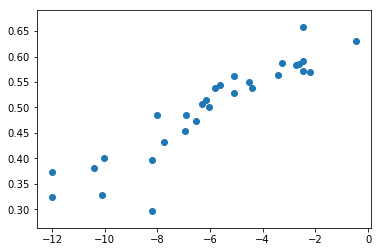

In [98]:
y = dm.WinPc
x = dm.DF
plt.scatter(x, y)
plt.show()

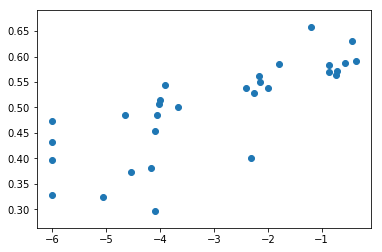

In [99]:
y = dm.WinPc
x = dm.DD
plt.scatter(x, y)
plt.show()

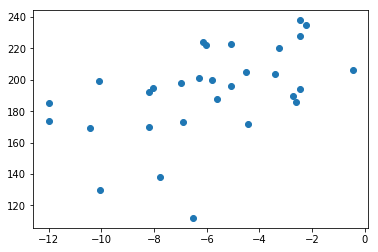

In [100]:
y = dm.GF
x = dm.DF
plt.scatter(x, y)
plt.show()

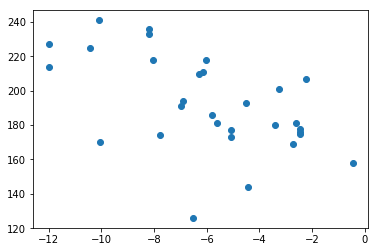

In [101]:
y = dm.GA
x = dm.DF
plt.scatter(x, y)
plt.show()

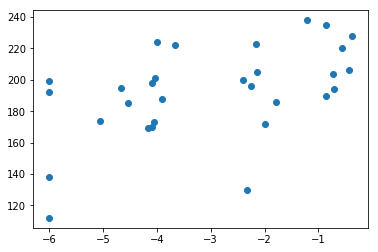

In [102]:
y = dm.GF
x = dm.DD
plt.scatter(x, y)
plt.show()

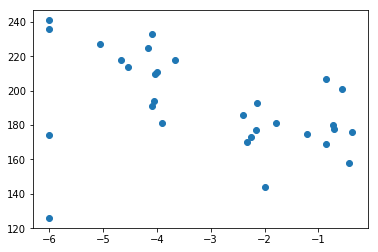

In [103]:
y = dm.GA
x = dm.DD
plt.scatter(x, y)
plt.show()